In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

p = ['#ffea00','#e71d36','#55dde0']

## Explicación de las variables del dataset:

### Clientes
- ID: identificador del cliente
- Year_Birth: año de nacimiento del cliente
- Education: Nivel de educación
- Marital_Status: Estado civil
- Income: Total de ingresos del cliente
- Kidhome: Número de niños que viven con el cliente
- Teenhome: Número de adolecentes que viven con el cliente
- Dt_Customer: Fecha de registro
- Recency: Número de dias desde ultima compra del cliente
- Complain: 1 si el cliente se quejó del servicio los ultimos
  años, 0 si no lo hizo.

### Productos
- MntWines: Cantidad gastada en vinos 
- MntFruits: Cantidad gastada en frutas
- MntMeatProducts: Cantidad gastada en carnes
- MntFishProducts: Cantidad gastada en pescados
- MntSweetProducts: Cantidad gastada en dulces 
- MntGoldProds: Amount Cantidad gastada en productos con base en oro

### Promociones
- NumDealsPurchases: numero de compras hechas con descuento
- AcceptedCmp1: 1 Si el cliente aceptó la oferta en esta campaña, 0   si no lo hizo
- AcceptedCmp2: 1 Si el cliente aceptó la oferta en esta campaña, 0 si no lo hizo
- AcceptedCmp3: 1 Si el cliente aceptó la oferta en esta campaña, 0 si no lo hizo
- AcceptedCmp4: 1 Si el cliente aceptó la oferta en esta campaña, 0 si no lo hizo
- AcceptedCmp5: 1 Si el cliente aceptó la oferta en esta campaña, 0 si no lo hizo
- Response: 1 Si el cliente aceptó la oferta en la última campaña, 0 si no lo hizo

### Lugar
- NumWebPurchases: Número de compras por la web
- NumCatalogPurchases: Número de compras por catalogo
- NumStorePurchases: Número de compras directamente en la tienda
- NumWebVisitsMonth: Número de visitas en el sitio web el último mes

# Características de nuestra data

In [2]:
data_raw = pd.read_csv("/work/marketing_campaign.csv", sep="\t")
data_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data_raw.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Limpieza de datos

## Valores nulos

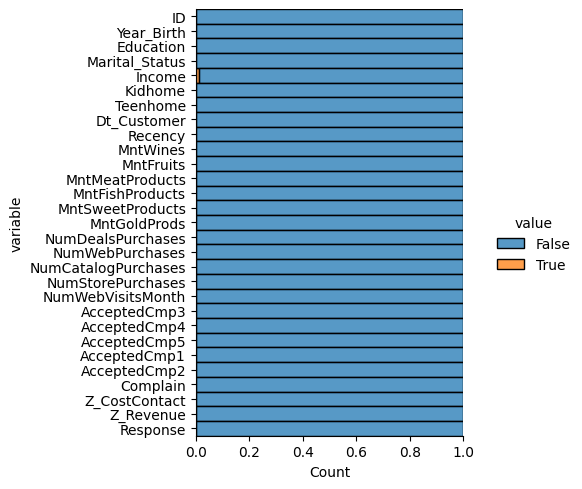

In [5]:
data_raw.isnull().melt().pipe(lambda df: sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill'
))
plt.show()

In [6]:
data_raw.Income.isnull().sum()

24

>Como vemos en la anterior tabla, en income tenemos en total 
24 valores nulos

## Imputando valores 

In [7]:
income_null = data_raw[data_raw['Income'].isnull()]
income_null

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


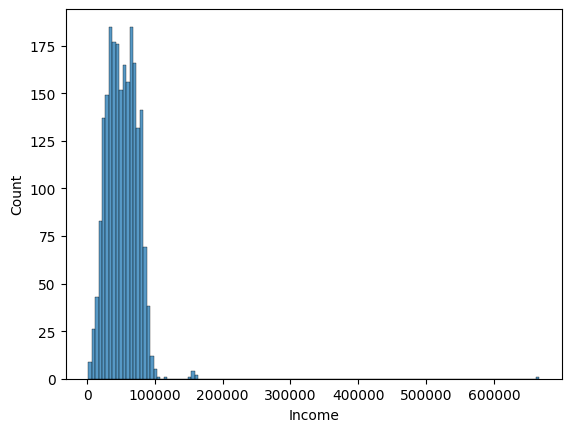

In [8]:
sns.histplot(data=data_raw,x='Income')
plt.show()

> Tenemos un gran outlier en el Income, lo que decidiré es retirarlo del conjunto de datos y los valores nulos los rellenaré con el promedio de datos de esa columna. Ya que, la distribución quitando el outlier exagerado es una distribución normal

>Filtraremos los datos sin el outlier para obtener el promedio que imputaremos a los datos:

In [9]:
#Para saber el promedio sin el outlier
data_copy = data_raw.copy()
data_copy = data_copy[data_copy['Income']<200000]
data_copy.Income.mean()

51969.861399548536

>Visualicemos esos datos:

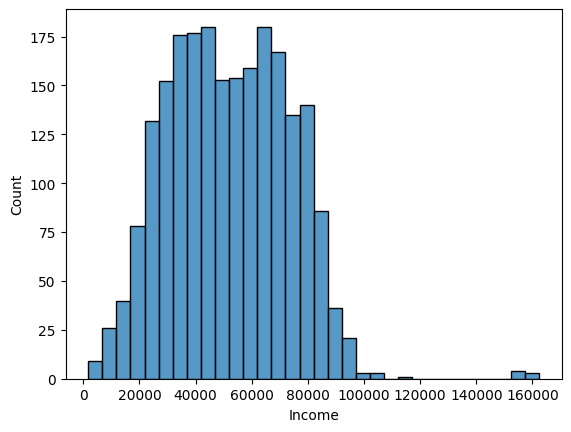

In [10]:
sns.histplot(data=data_copy,x='Income')
plt.show()

> Inputaremos el promedio a los valores nulos que tenemos y tendremos un dataset sin valores nulos.

In [11]:
data_raw['Income'] = data_raw['Income'].fillna(value=data_copy.Income.mean())

In [12]:
data_raw = data_raw[data_raw['Income']<200000]

## Reorganizando los features o variables

> Transformaremos algunos features para que sean más facil de leer:

In [13]:
data_raw=data_raw.rename(
    columns=
    {"MntWines": "Wines",
    "MntFruits":"Fruits",
    "MntMeatProducts":"Meat",
    "MntFishProducts":"Fish",
    "MntSweetProducts":"Sweets",
    "MntGoldProds":"Gold"}
    )

In [14]:
data_raw["Spent"] = data_raw["Wines"]+ data_raw["Fruits"]+ data_raw["Meat"]+ data_raw["Fish"]+ data_raw["Sweets"]+ data_raw["Gold"]
#Creacion de feature Age
data_raw['Age'] = 2023-data_raw['Year_Birth']

#Creacion de feature Children, con el total de hijos
series = pd.DataFrame(data_raw['Kidhome']+data_raw['Teenhome'])
series.columns = ['Children']
series
data_raw = pd.concat([data_raw,series],axis=1)


#arreglos en Marital_status
data_raw['Marital_Status'] = data_raw['Marital_Status'].replace(['Alone',
       'Absurd', 'YOLO'],'Single')


In [15]:
#Quitaremos algunos outliers en las edades
data_raw = data_raw[data_raw['Age']<=85]

In [18]:
#eliminando columnas que no sean necesarias para el modelo.
cols_to_delete = ['ID','Year_Birth','Z_CostContact', 'Z_Revenue','Dt_Customer']
data = data_raw.copy()
data.drop(cols_to_delete,inplace=True,axis=1)

In [19]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Age,Children
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,1617,66,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,27,69,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,776,58,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,53,39,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,422,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0,0,1341,56,1
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,444,77,3
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,1241,42,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,843,67,1


# Preprocesamiento

In [20]:
df_transformed = data.copy()

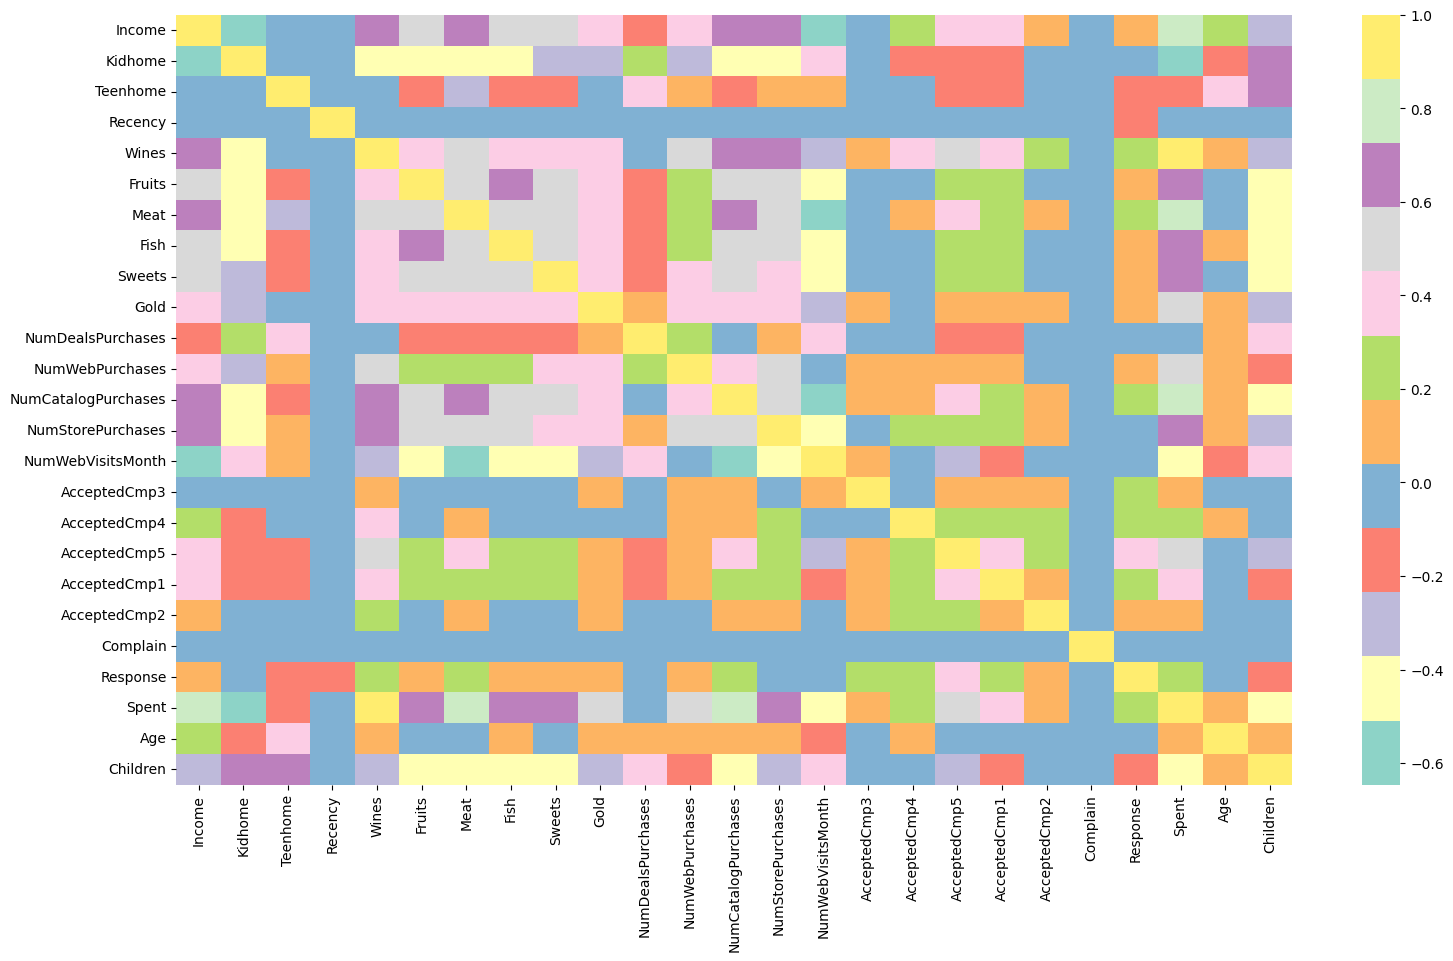

In [21]:
plt.figure(figsize=(18,10))
sns.heatmap(df_transformed.corr(),cmap='Set3')
plt.show()

In [22]:
#columnas de promos
proms_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','NumDealsPurchases','Response']

df_sin_proms = df_transformed.copy()
df_sin_proms.drop(proms_cols,axis=1,inplace=True)


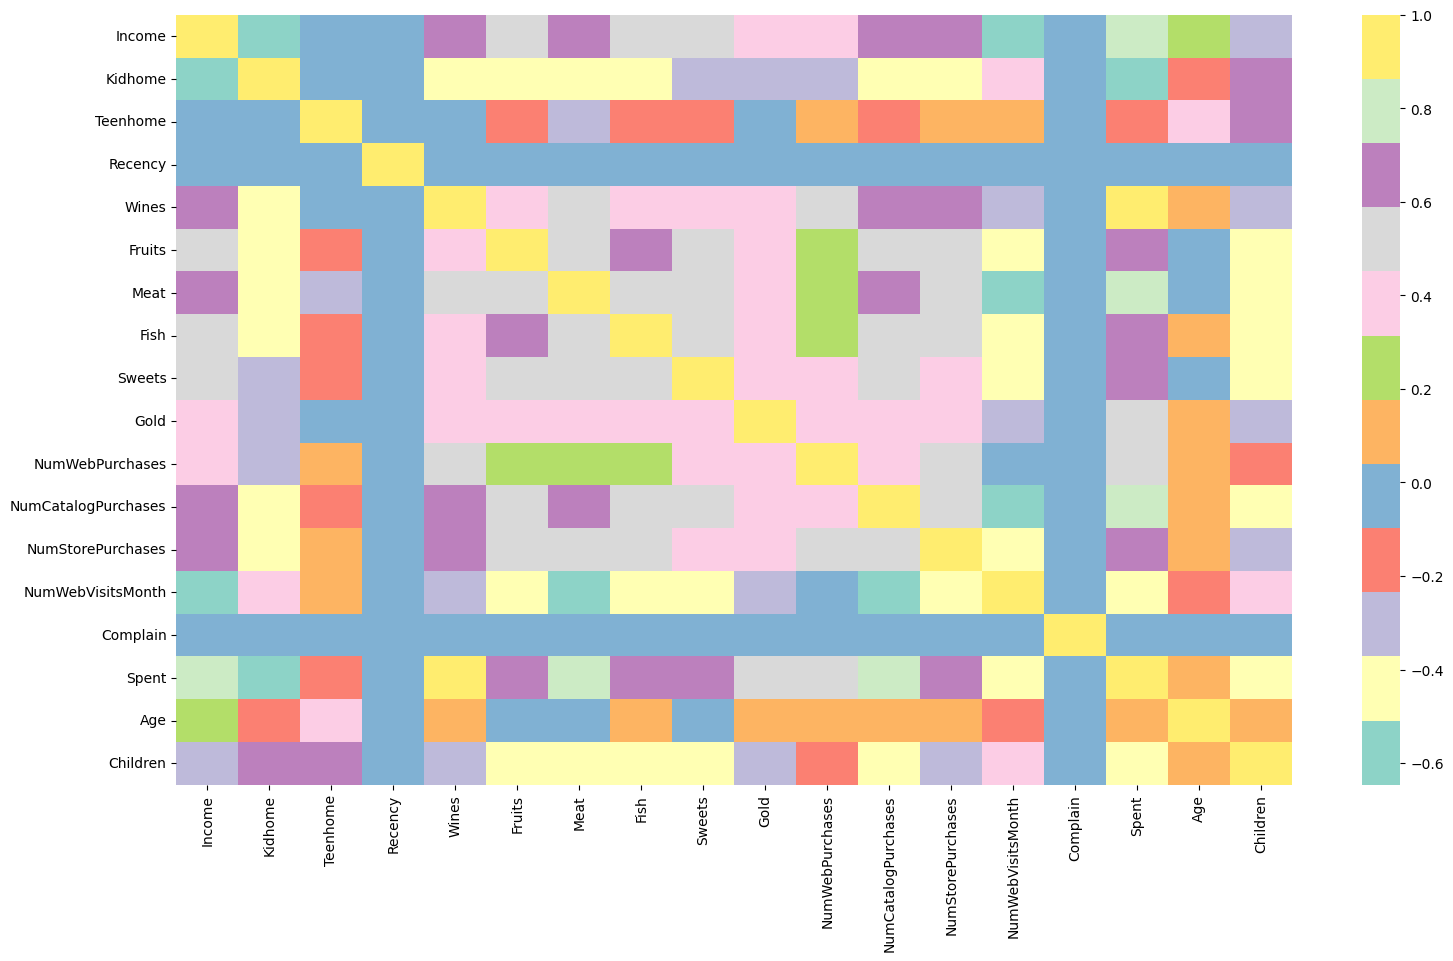

In [23]:
plt.figure(figsize=(18,10))
sns.heatmap(df_sin_proms.corr(),cmap='Set3')
plt.show()

## Transformación no lineal para algunos de nuestros datos

In [24]:
columns_to_transform = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

In [25]:
df_transformed['Fruits'] = df_transformed['Fruits'].apply(lambda x: np.tanh(x/15))
df_transformed['Meat'] = df_transformed['Meat'].apply(lambda x: np.tanh(x/150))
df_transformed['Wines'] = df_transformed['Wines'].apply(lambda x: np.tanh(x/300))
df_transformed['Gold'] = df_transformed['Gold'].apply(lambda x: np.tanh(x/65))
df_transformed['Sweets'] = df_transformed['Sweets'].apply(lambda x: np.tanh(x/19.5))
df_transformed['Fish'] = df_transformed['Fish'].apply(lambda x: np.tanh(x/12))

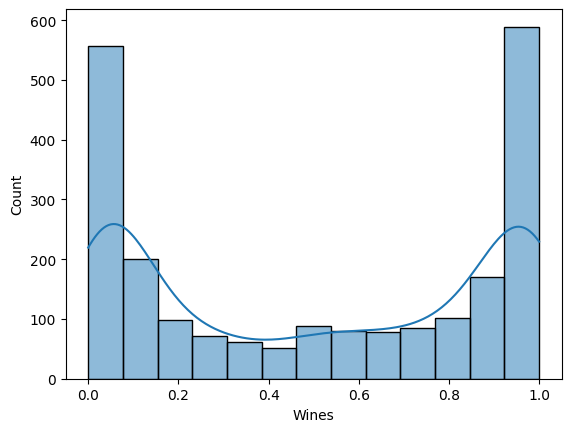

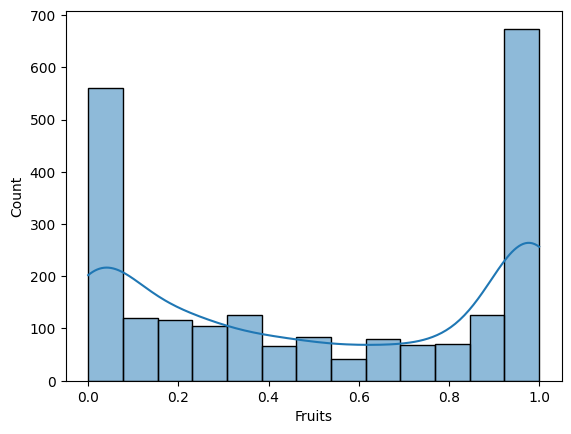

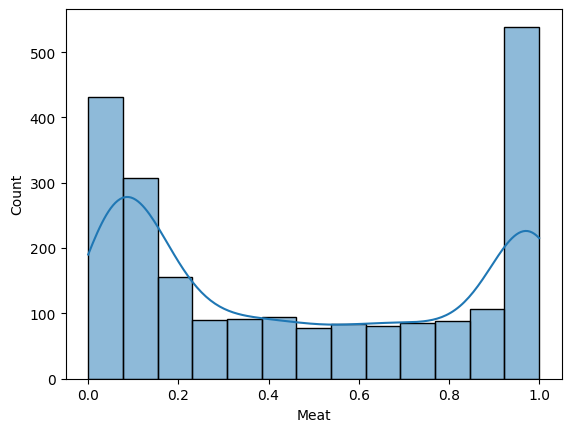

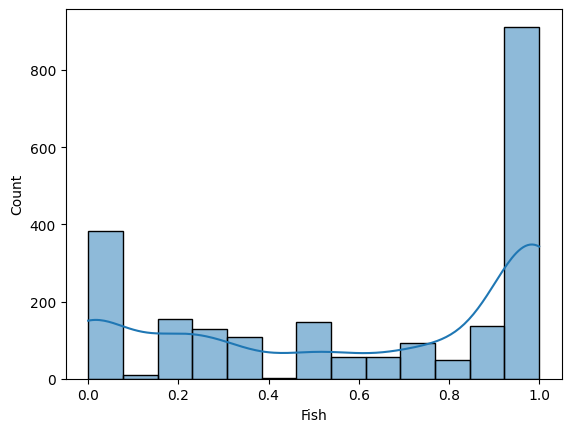

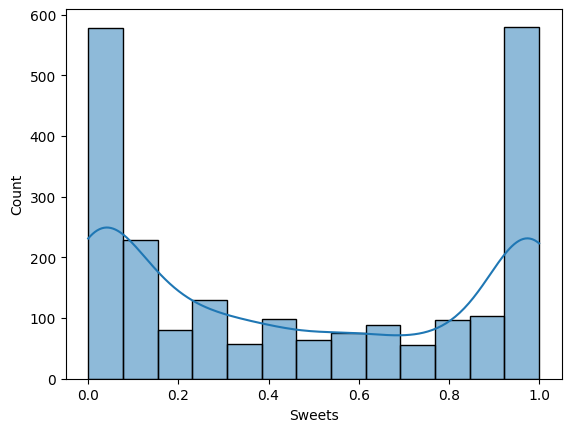

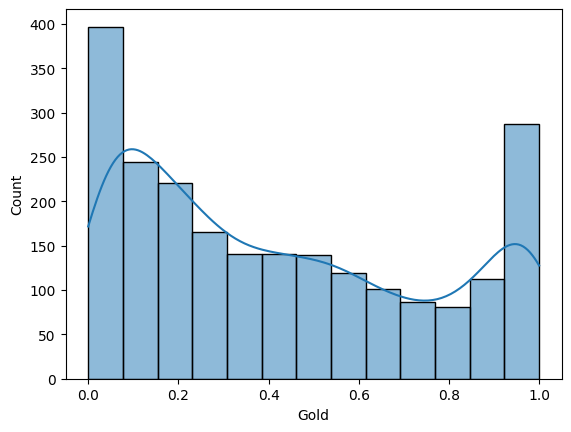

In [26]:
for _ in df_transformed[columns_to_transform]:
    sns.histplot(data=df_transformed,x=_,kde=True)
    plt.show()

## Escalamiento

In [27]:
df_transformed = pd.get_dummies(df_transformed,columns=['Marital_Status','Education'],drop_first=True)

In [28]:
df_transformed

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Age,Children,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,0,0,58,0.971407,0.999984,0.998623,1.000000,0.999759,0.874958,...,66,0,0,1,0,0,0,1,0,0
1,46344.0,1,1,38,0.036650,0.066568,0.039979,0.165140,0.051237,0.092046,...,69,2,0,1,0,0,0,1,0,0
2,71613.0,0,0,26,0.889599,0.997096,0.689324,1.000000,0.792055,0.569075,...,58,0,0,0,1,0,0,1,0,0
3,26646.0,1,0,26,0.036650,0.260520,0.132549,0.682262,0.152644,0.076772,...,39,1,0,0,1,0,0,1,0,0
4,58293.0,1,0,94,0.520238,0.993548,0.656517,0.999064,0.881981,0.226758,...,42,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,0.982444,0.993548,0.837677,0.998178,0.999989,0.999000,...,56,1,1,0,0,0,0,1,0,0
2236,64014.0,2,1,56,0.874838,0.000000,0.197375,0.000000,0.000000,0.122459,...,77,3,0,0,1,0,0,0,0,1
2237,56981.0,0,0,91,0.995311,0.996682,0.895032,0.990390,0.547906,0.353319,...,42,0,0,0,0,0,0,1,0,0
2238,69245.0,0,1,8,0.890981,0.964028,0.890981,0.999997,0.911861,0.734515,...,67,1,0,0,1,0,0,0,1,0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
df_scaled = scaler.fit_transform(df_transformed)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_transformed.columns

In [33]:
data_proms = data[proms_cols]

In [34]:
df_scaled

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Age,Children,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.288653,-0.824939,-0.930615,0.306856,1.182913,1.209348,1.368258,0.979431,1.322589,1.373256,...,1.016868,-1.264308,-0.793560,1.897583,-0.590434,-0.188851,-0.157315,0.992870,-0.445292,-0.526293
1,-0.262299,1.032627,0.905974,-0.383971,-1.198627,-1.121205,-1.175191,-1.124904,-1.067623,-1.023579,...,1.273264,1.395139,-0.793560,1.897583,-0.590434,-0.188851,-0.157315,0.992870,-0.445292,-0.526293
2,0.918132,-0.824939,-0.930615,-0.798467,0.974486,1.202137,0.547635,0.979431,0.799189,0.436814,...,0.333146,-1.264308,-0.793560,-0.526986,1.693668,-0.188851,-0.157315,0.992870,-0.445292,-0.526293
3,-1.182483,1.032627,-0.930615,-0.798467,-1.198627,-0.636944,-0.929587,0.178545,-0.812085,-1.070341,...,-1.290693,0.065416,-0.793560,-0.526986,1.693668,-0.188851,-0.157315,0.992870,-0.445292,-0.526293
4,0.295893,1.032627,-0.930615,1.550344,0.033442,1.193279,0.460591,0.977072,1.025795,-0.611167,...,-1.034298,0.065416,1.260144,-0.526986,-0.590434,-0.188851,-0.157315,-1.007181,-0.445292,1.900081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.432767,-0.824939,0.905974,-0.107640,1.211032,1.193279,0.941240,0.974838,1.323168,1.753001,...,0.162216,0.065416,1.260144,-0.526986,-0.590434,-0.188851,-0.157315,0.992870,-0.445292,-0.526293
2232,0.563147,2.890194,0.905974,0.237773,0.936878,-1.287412,-0.757591,-1.541155,-1.196737,-0.930472,...,1.956986,2.724862,-0.793560,-0.526986,1.693668,-0.188851,-0.157315,-1.007181,-0.445292,1.900081
2233,0.234604,-0.824939,-0.930615,1.446720,1.243815,1.201104,1.093413,0.955210,0.183950,-0.223710,...,-1.034298,-1.264308,-0.793560,-0.526986,-0.590434,-0.188851,-0.157315,0.992870,-0.445292,-0.526293
2234,0.807511,-0.824939,0.905974,-1.420212,0.978008,1.119572,1.082667,0.979423,1.101092,0.943297,...,1.102333,0.065416,-0.793560,-0.526986,1.693668,-0.188851,-0.157315,-1.007181,2.245717,-0.526293


# PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA()
pca.fit(df_scaled)
df_pca_scaled = pca.transform(df_scaled)

In [37]:
df_pca_scaled

array([[ 3.96013371e+00, -5.24325502e-01, -6.35865563e-01, ...,
        -2.73122136e-01,  2.45539522e-02, -3.92791205e-16],
       [-3.44569063e+00,  2.78570096e-01, -5.24674749e-02, ...,
         1.65909876e-02,  1.38060010e-01, -6.79254908e-17],
       [ 2.76244124e+00, -4.58231063e-01, -1.59826106e+00, ...,
        -3.35431208e-01, -4.94920223e-02,  9.20367383e-17],
       ...,
       [ 2.71187167e+00, -1.01896265e+00, -3.46608086e-01, ...,
         5.90643540e-02, -1.12829732e-01, -1.13281401e-16],
       [ 2.93209993e+00,  1.58965167e+00, -6.53046400e-01, ...,
         9.09741977e-02, -2.28575837e-01,  3.49890915e-16],
       [-2.27050540e+00,  1.72589234e+00,  2.15196945e+00, ...,
         4.34775871e-01, -1.70881539e-01, -2.42814336e-16]])

In [38]:
varianza = pca.explained_variance_ratio_
print(varianza)

[2.62191629e-01 7.54184317e-02 6.04212547e-02 5.13828847e-02
 4.58258167e-02 4.41631120e-02 3.89639674e-02 3.66190176e-02
 3.48716687e-02 3.36134473e-02 3.04546748e-02 2.99062741e-02
 2.80820548e-02 2.68810253e-02 2.38279344e-02 2.05584836e-02
 1.88350394e-02 1.72403409e-02 1.56551495e-02 1.51561480e-02
 1.36542821e-02 1.31338805e-02 1.14155778e-02 9.98851485e-03
 9.40841971e-03 8.36590132e-03 6.44282150e-03 4.59067655e-03
 4.31358141e-03 3.69475335e-03 2.85929468e-03 2.06394113e-03
 5.17081815e-32]


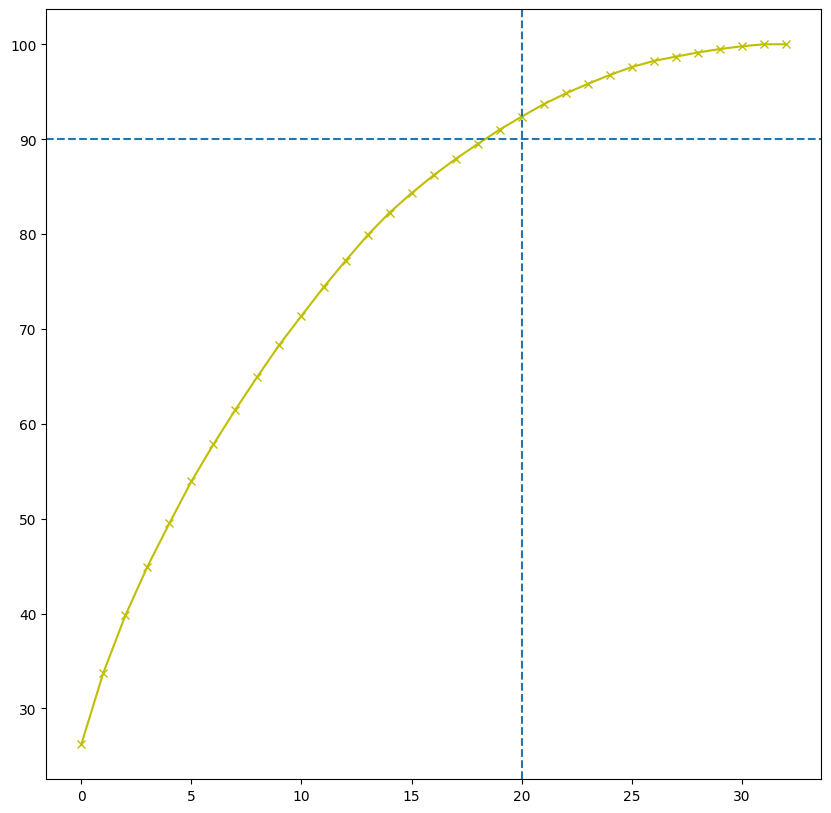

In [39]:
suma_varianza = np.cumsum(np.round(varianza,decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(suma_varianza, 'y-x')
plt.axvline(x=20,linestyle='dashed')
plt.axhline(y=90,linestyle='dashed')

In [40]:
df_pca_standard = pd.DataFrame(df_pca_scaled)

In [41]:
df_pca_standard

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,3.960134,-0.524326,-0.635866,1.805965,1.070193,-1.762513,-1.171664,0.287031,0.459861,0.347582,...,0.814694,-0.274266,0.302506,0.371430,-0.271522,0.147030,0.150734,-0.273122,0.024554,-3.927912e-16
1,-3.445691,0.278570,-0.052467,0.388201,0.986488,0.620141,-2.026337,1.420704,0.606975,-0.642257,...,0.025361,0.110496,0.052370,0.006509,0.035343,0.202414,0.069910,0.016591,0.138060,-6.792549e-17
2,2.762441,-0.458231,-1.598261,-0.434421,1.293855,0.733036,0.573884,-1.010645,0.251247,0.099875,...,-0.472901,0.361154,-0.462934,-0.134466,0.226587,0.299717,-0.249831,-0.335431,-0.049492,9.203674e-17
3,-2.834303,-1.496963,-0.854671,0.451847,1.244331,0.958365,0.843081,-0.922351,-0.070201,-0.395433,...,-0.609898,-0.233909,-0.133513,0.236755,-0.222972,-0.000533,-0.114074,-0.007156,0.160330,3.295294e-16
4,0.507987,0.294198,-0.550908,-0.483243,-1.733579,-1.126956,-0.005745,-1.231789,-2.038226,-0.425419,...,-0.166649,0.884548,-0.298460,-0.206601,0.032144,0.153248,-0.492435,-0.096245,-0.180253,-4.059401e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2.760119,1.127359,-1.815441,0.859483,-1.316077,0.208505,0.044245,-0.227619,0.254815,0.391419,...,0.363108,0.235334,0.159392,-0.594632,-0.774255,-0.216018,0.216181,-0.283466,0.078747,1.657985e-16
2232,-1.980611,4.099513,2.671725,0.659443,1.118152,0.429348,0.359077,-1.312800,-0.907125,-1.408282,...,-0.540229,0.767833,-0.468963,-0.131814,-0.010933,0.129099,-0.023408,-0.675309,-0.212969,5.789460e-16
2233,2.711872,-1.018963,-0.346608,0.301395,0.133174,1.522237,-0.338025,0.695768,-2.136624,1.203263,...,0.436375,-1.265901,-0.403375,-0.122134,0.359306,-1.063620,-0.164334,0.059064,-0.112830,-1.132814e-16
2234,2.932100,1.589652,-0.653046,-1.806994,1.482417,-0.460292,2.160297,0.733175,0.960186,-0.271305,...,0.199504,-0.026152,0.132107,0.365990,-0.096462,0.144442,-0.304082,0.090974,-0.228576,3.498909e-16


In [42]:
r = np.arange(19,31)
df_pca_standard.drop(r,axis=1,inplace=True)

# Clustering

In [43]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Kmeans

In [44]:
suma_cuadrados = []
sil_score = []
k = range(2,18)
for i in k:
    kmeans = KMeans(n_clusters=i)
    y = kmeans.fit_predict(df_pca_standard)
    suma_cuadrados.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_pca_standard,y))


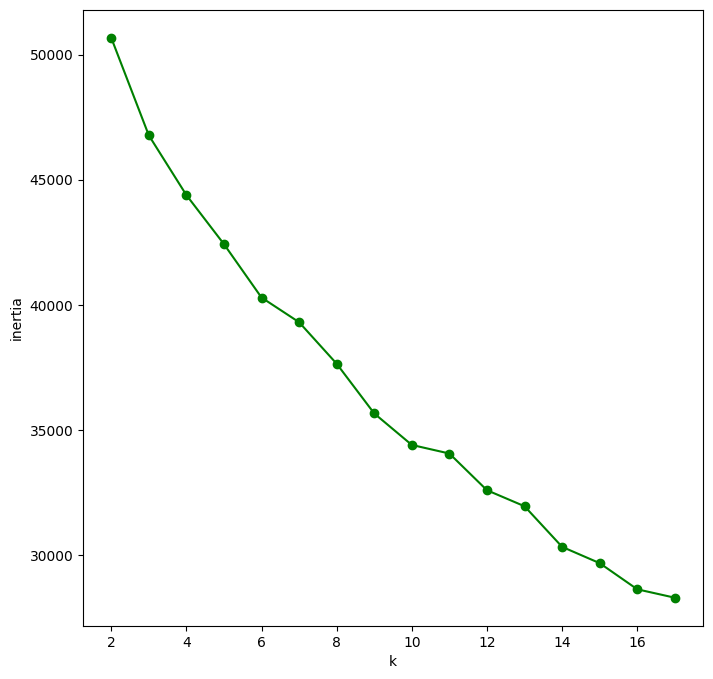

In [45]:
fig = plt.figure(figsize=(8,8))
plt.plot(k,suma_cuadrados, 'g-o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

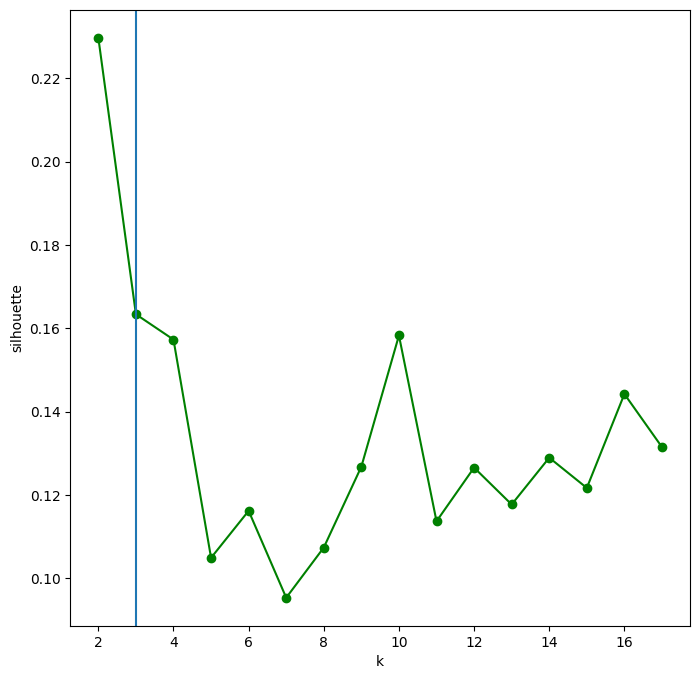

In [46]:
fig = plt.figure(figsize=(8,8))
plt.plot(k,sil_score, 'g-o')
plt.xlabel('k')
plt.ylabel('silhouette')
plt.axvline(x=3)
plt.show()

In [47]:
kmeans = KMeans(n_clusters=3)
y= kmeans.fit_predict(df_pca_standard)
print(silhouette_score(df_pca_standard,y))
data_raw['kmeans_pca'] = y

0.1633485771771135


## hierarchical

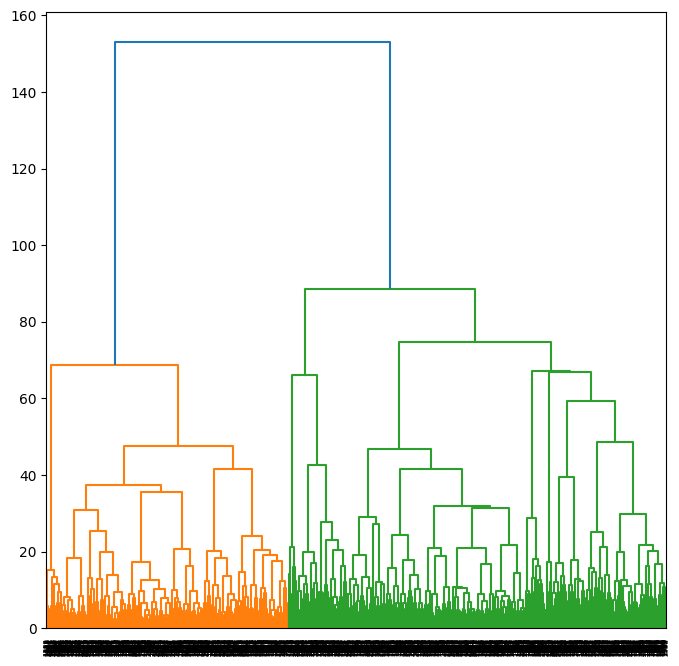

In [48]:
plt.figure(figsize=(8,8))
dendrogram(linkage(df_pca_standard,method='ward'))
plt.show()



In [49]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_pca_standard)
print(silhouette_score(df_pca_standard,y_hc))
data_raw['hc_pca'] = y_hc


0.15811943453906377


## Observando segmentación

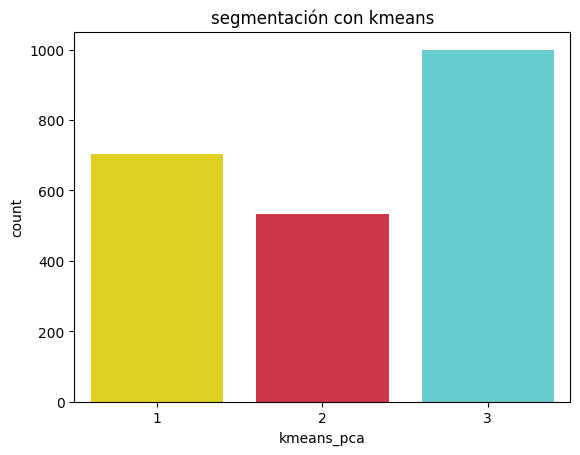

In [86]:
sns.countplot(data_raw,x='kmeans_pca',palette=p)
plt.title('segmentación con kmeans')
plt.show()

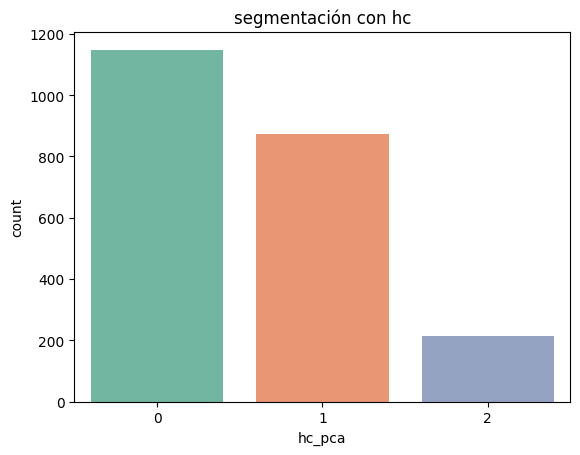

In [51]:
sns.countplot(data_raw,x='hc_pca',palette='Set2')
plt.title('segmentación con hc')
plt.show()

## Conclusiones del clustering

Kmeans tuvo un mejor indice de silueta en la segmentacion, por lo tanto va a ser el elegido para algunos analisis 

# Análisis exploratorio con la segmentación

## Subdividiendo los segmentos

In [52]:
data_raw['kmeans_pca'] = data_raw['kmeans_pca'].replace([0,1,2],[1,2,3])

In [53]:
grupos = data_raw.copy()
grupo_1 = grupos[grupos['kmeans_pca']==1]
grupo_2 = grupos[grupos['kmeans_pca']==2]
grupo_3 = grupos[grupos['kmeans_pca']==3]
print(
        f'cluster 1 size: {grupo_1.shape}',
        f'cluster 2 size: {grupo_2.shape}',
        f'cluster 3 size: {grupo_3.shape}',
        sep='\n'
     )

cluster 1 size: (703, 34)
cluster 2 size: (533, 34)
cluster 3 size: (1000, 34)


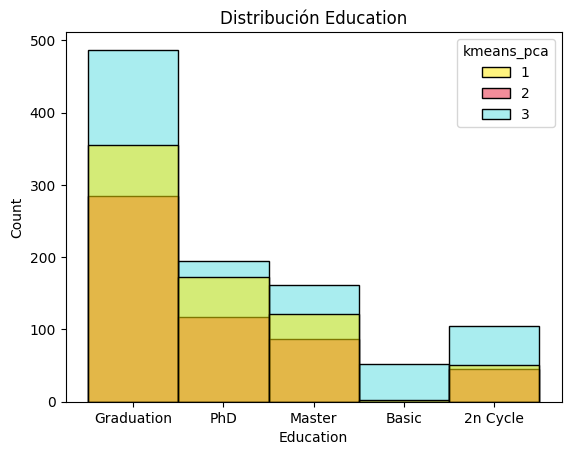

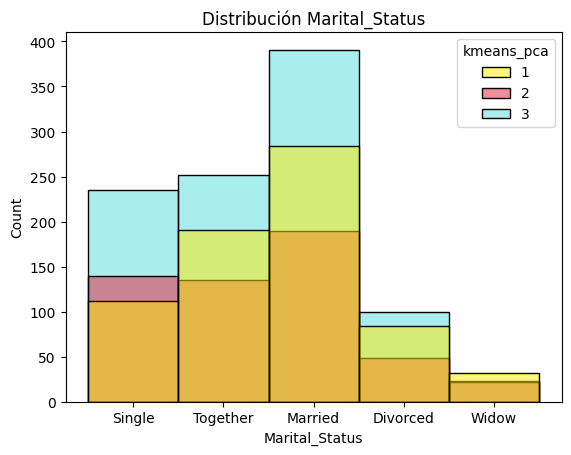

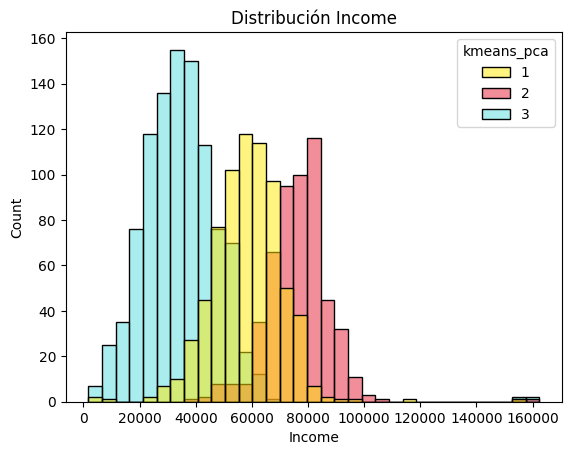

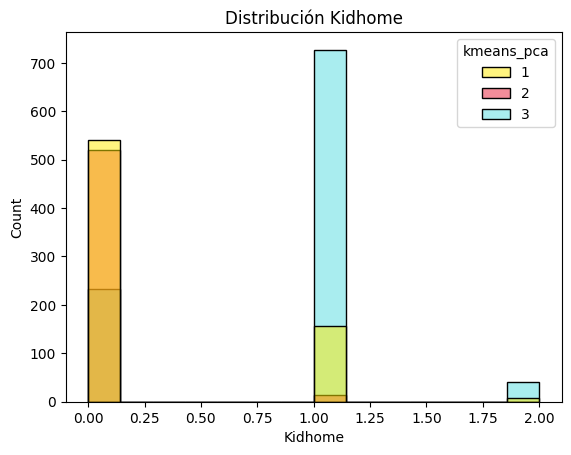

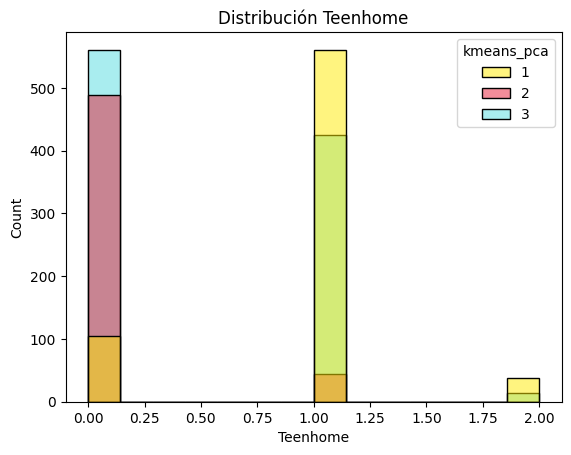

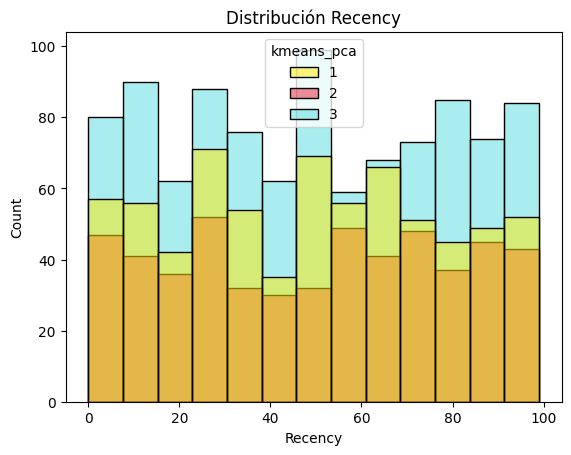

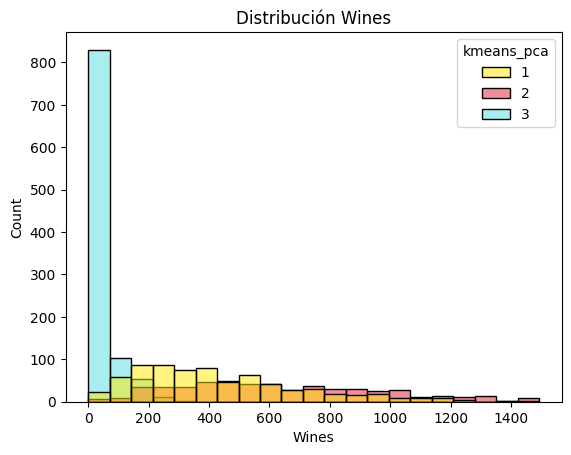

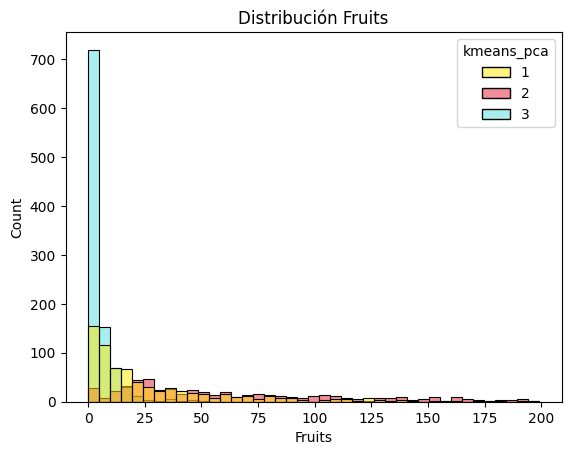

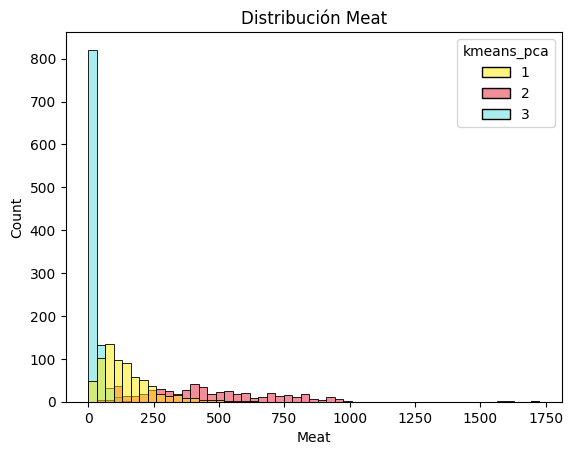

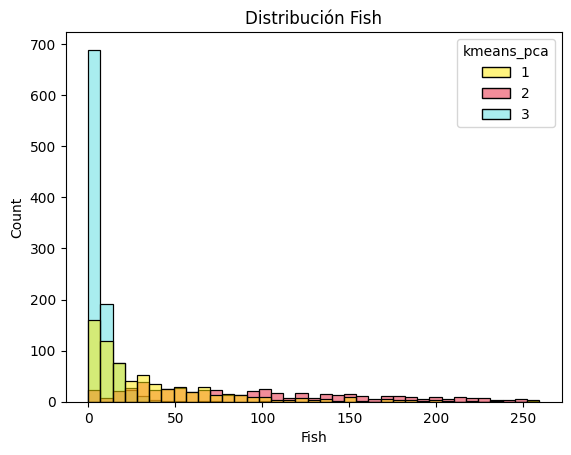

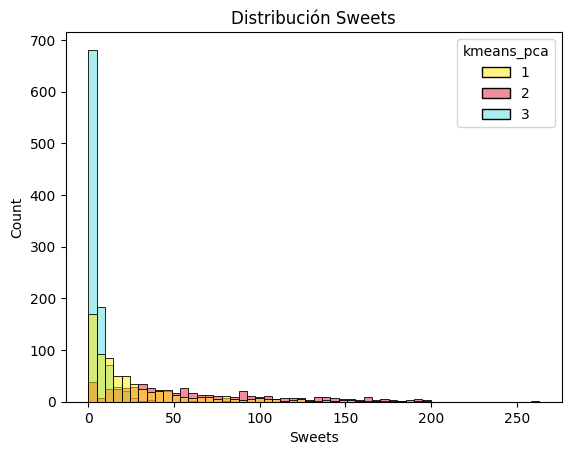

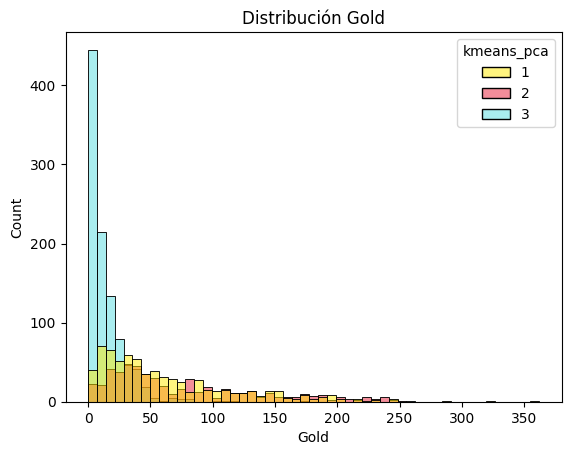

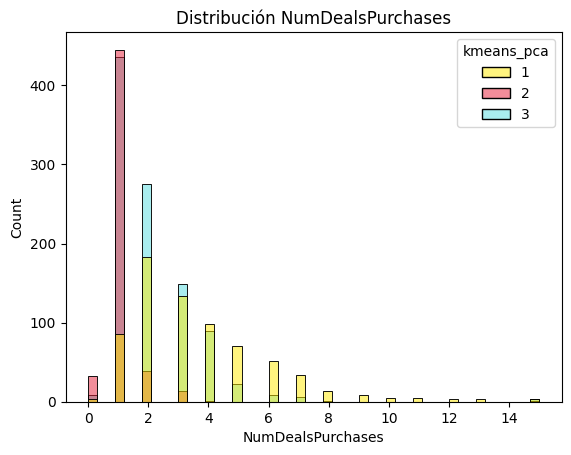

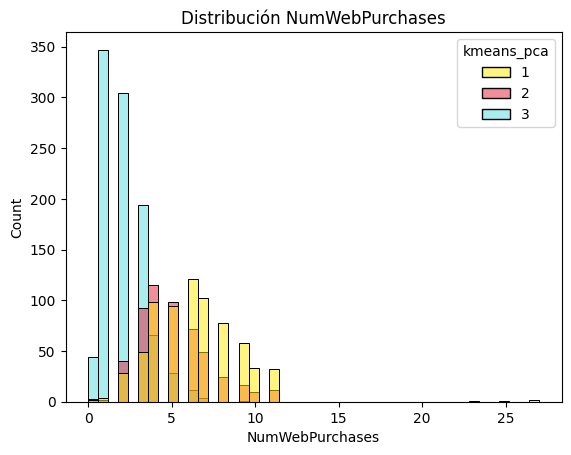

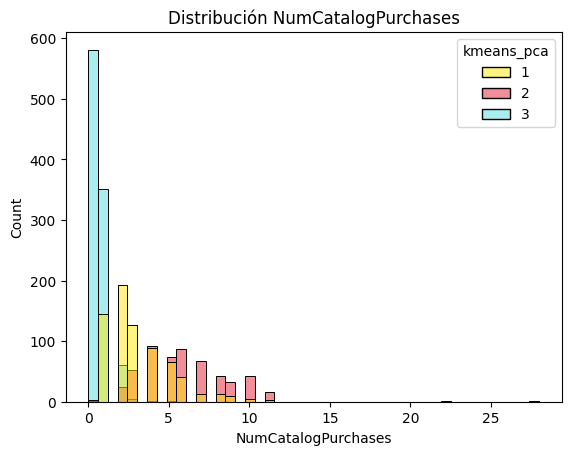

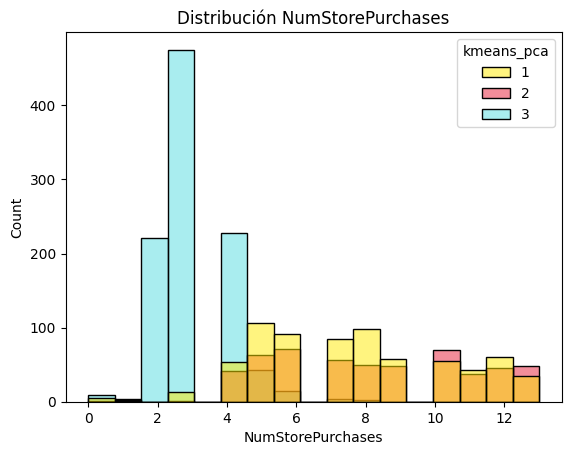

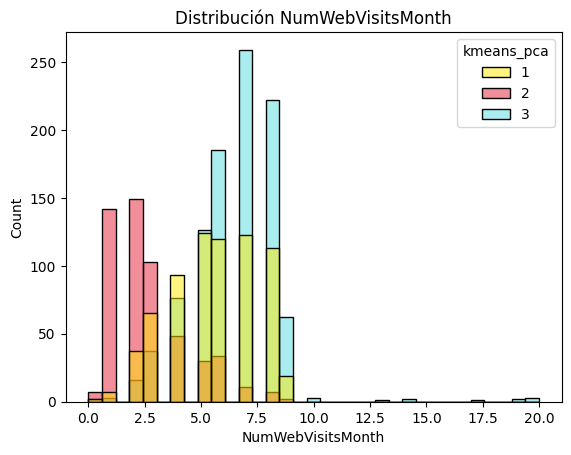

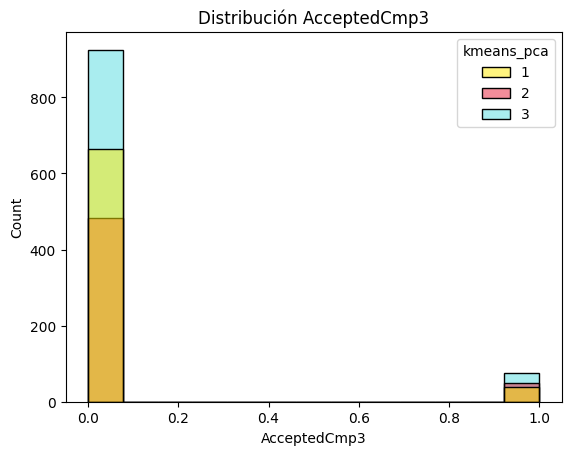

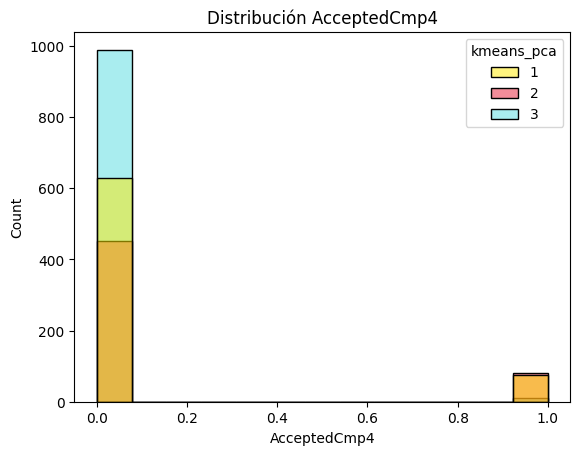

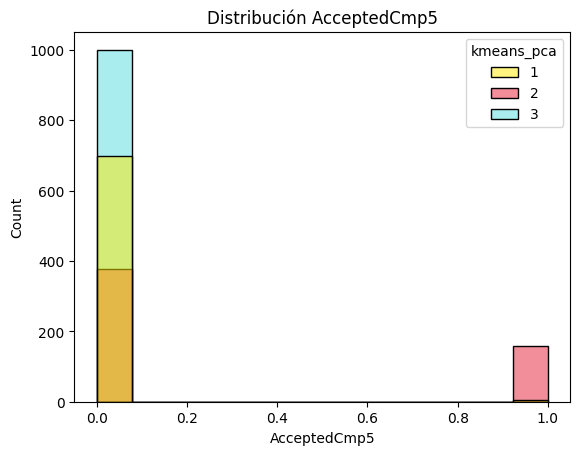

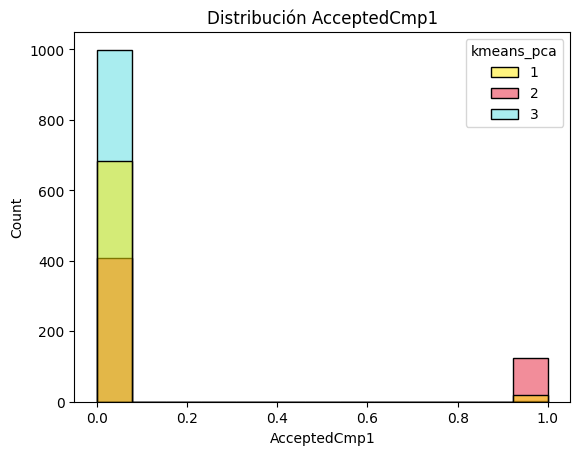

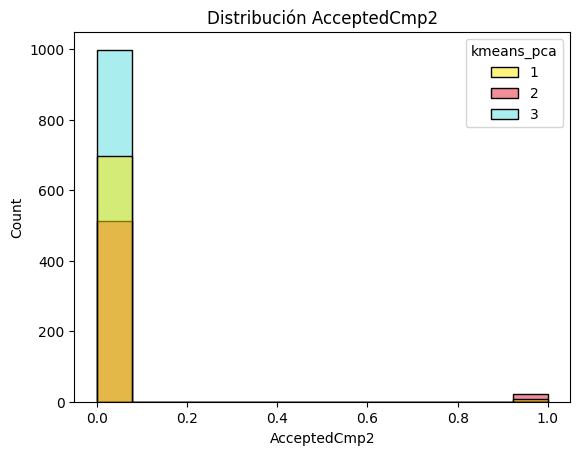

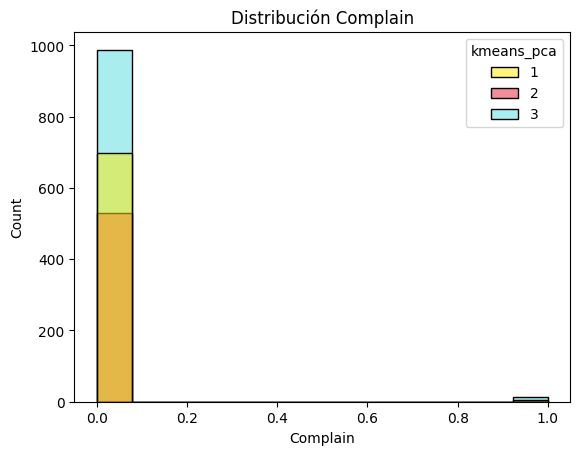

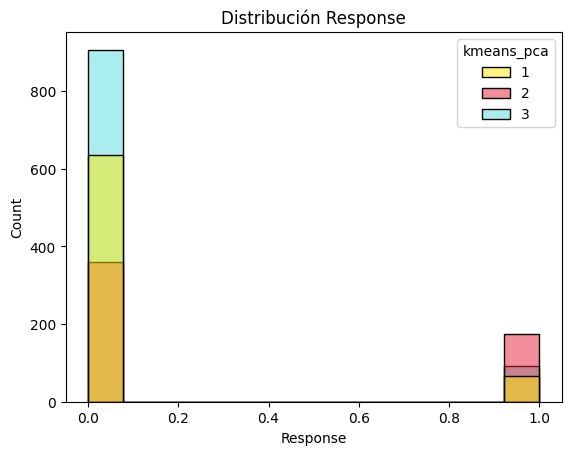

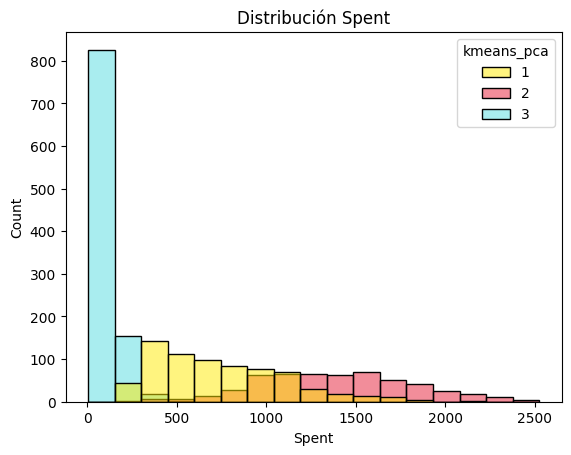

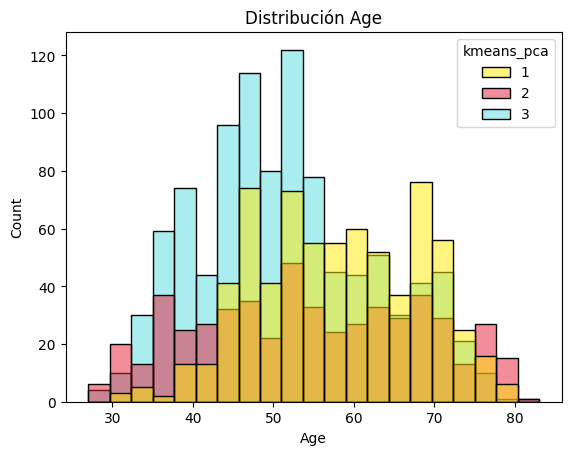

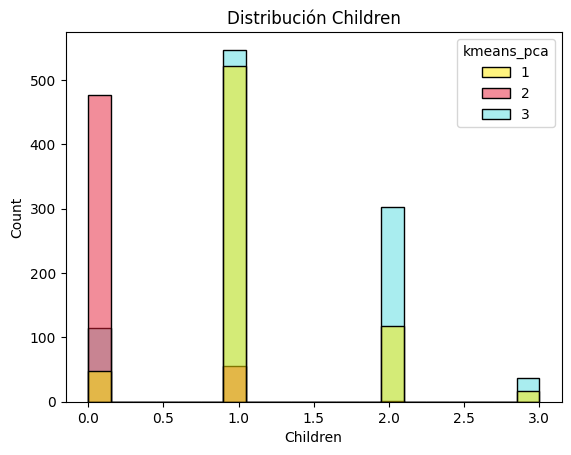

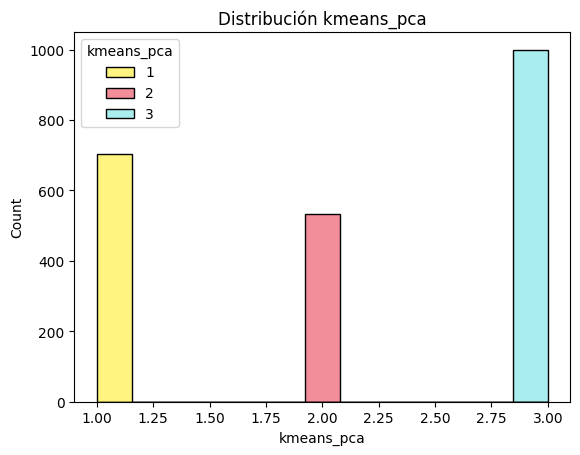

In [83]:
for i in data_raw.drop(['hc_pca','ID','Year_Birth','Z_CostContact', 'Z_Revenue','Dt_Customer'],axis=1):
    sns.histplot(data=data_raw.drop(['hc_pca','ID','Year_Birth','Z_CostContact', 'Z_Revenue','Dt_Customer'],axis=1),x=i,hue='kmeans_pca',palette=p)
    plt.title(f"Distribución {i}")
    plt.show()

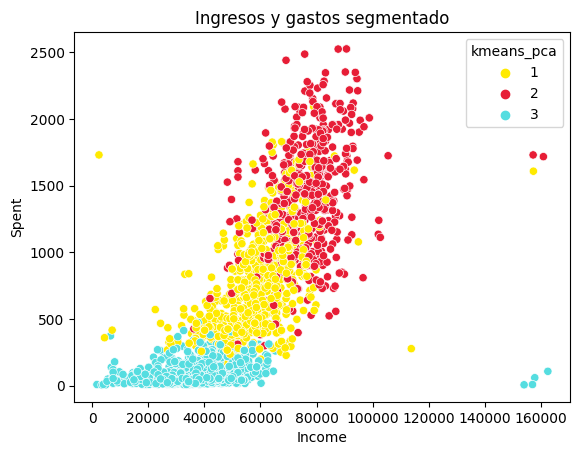

In [84]:
sns.scatterplot(data=data_raw,x='Income',y='Spent',hue='kmeans_pca',palette=p)
plt.title('Ingresos y gastos segmentado')
plt.show()

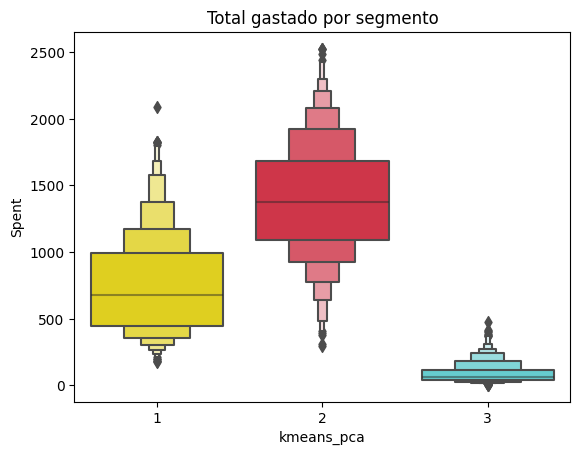

In [85]:
sns.boxenplot(y=data_raw["Spent"],x=data_raw["kmeans_pca"], palette=p )
plt.title('Total gastado por segmento')
plt.show()


# Conclusiones

## Grupo 1 Amarillo

- Sería nuestro grupo con ingresos medios.

- Son los que más compran por el sitio web.

- Son el grupo que más hijos adolescentes tienen.

- Son los que mayor compras por descuento hacen.

## Grupo 2 Rojo

- Es el segmento con mayor poder adquisitivo.

- Son los que gastan mucho más dinero en los productos.

- Este grupo se caracteriza  en su mayoría por no tener hijos.

- Son los que más aceptan las promociones.

- Son los que menos compras hacen con descuento.

- Son los que compran más por catalogo.

## Grupo 3 Azul

- Tiene menores ingresos.

- Compra menos productos.

- Su promedio de edades es más bajo.

- Suelen tener al menos un hijo, Además este grupo es de los que más tienen niños menores de 10 años

- Es el grupo que más visitó la página web el último mes, sin embargo es el que menos compra por este medio.

- Hay mayor cantidad de personas.

- Generán compras de entre 1/200 en todos los productos en mayor proporción.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27c42daa-8624-4a61-9f8a-21233f0bfe9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>